Introduction to Machine Learning and Analysis (Statistics)

Analyst = Kofi Anane Poku

Linkedin Profile : linkedin.com/in/kofi-poku-anane


TABLE OF CONTENT

Link to Download Dataset

Link : https://drive.google.com/file/d/1X88t49qgHooTlbIFj_-LPGF-tZDph0g0/view?usp=drive_link


This project consist of the analysis of Household Power Consumption dataset .In this analysis, its divided into two fields.

1 . Data Preparation

2 . Statistical Analysis

3 . Machine Learning


Under Statistical Analysis , the following concept was tackled :
  
    1 . Mean
    2 . Median 
    3 . Mode
    4 . Correlation
    5 . Standard Deviation
    6 . Normal Distribution ( The 68-95-99 rule)

          Under Normal Distribution , the statistical terms were tackled :

                   1 . Shapiro-Wilk Test
                   2 . Standard Error of the Mean
                   3 . Confidential Interval
                   4 . T - test
                   5 . Chi-square Test

    7 . Linear Regression

    8 . Multilinear Regression

         Between Linear Regression and Multilinear Regression ,  Statistical terms such as The intercept(Const) , The R-squared , The Confidence Interval  and Statistical Significance were explained in the output result
         

Under Machine Learning ,scikit-learn was used to instantiate the models . The following were tackled  :

    1 . Random Forest Regressor 

    2 . Random Forest Classifier


 
 
Finally , Conclusion   
                       
              
    



In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from dateutil import parser
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [118]:
householdPowerConsumption_analysis = pd.read_csv('household_power_consumption.csv')

In [119]:
householdPowerConsumption_analysis

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


Checking Duplicates in the dataset

In [120]:
duplicatedrow = householdPowerConsumption_analysis[householdPowerConsumption_analysis.duplicated()].shape[0]
if(duplicatedrow == 0):
    print('There is no duplicated row in the csv file')
else:
    print('There is duplicated rows in the csv file')   

There is no duplicated row in the csv file


Removing NaN values in the dataset

In [121]:
householdPowerConsumption_analysis.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [122]:
householdPowerConsumption_analysis['Sub_metering_3'] = householdPowerConsumption_analysis['Sub_metering_3'].fillna(0)

In [123]:
householdPowerConsumption_analysis.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [124]:
householdPowerConsumption_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1048575 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


Convert dataset variables dtypes to their corresponding dtypes

In [125]:
householdPowerConsumption_analysis.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [126]:
householdPowerConsumption_analysis['Date'] = pd.to_datetime(householdPowerConsumption_analysis['Date'] ,dayfirst=True)

In [127]:
householdPowerConsumption_analysis['Date'] = pd.to_datetime(householdPowerConsumption_analysis['Date'],format='%d/%m/%y')

In [128]:
#householdPowerConsumption_analysis['Time'] = (pd.to_timedelta(householdPowerConsumption_analysis['Time'].str.strip()))

In [129]:
householdPowerConsumption_analysis['Global_active_power'] = pd.to_numeric(householdPowerConsumption_analysis['Global_active_power'] , errors='coerce')
householdPowerConsumption_analysis['Voltage'] = pd.to_numeric(householdPowerConsumption_analysis['Voltage'], errors='coerce')
householdPowerConsumption_analysis['Global_intensity'] = pd.to_numeric(householdPowerConsumption_analysis['Global_intensity'],errors='coerce')
householdPowerConsumption_analysis['Global_reactive_power'] = pd.to_numeric(householdPowerConsumption_analysis['Global_reactive_power'],errors='coerce')
householdPowerConsumption_analysis['Sub_metering_1'] = pd.to_numeric(householdPowerConsumption_analysis['Sub_metering_1'] , errors='coerce')
householdPowerConsumption_analysis['Sub_metering_2'] = pd.to_numeric(householdPowerConsumption_analysis['Sub_metering_2'], errors='coerce')


Replacing NaN values with 0 once again because the errors = 'coerce' method replaces error in the dataset with NaN values

In [130]:
householdPowerConsumption_analysis.isnull().sum()

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3              0
dtype: int64

In [131]:
householdPowerConsumption_analysis['Global_active_power'] = householdPowerConsumption_analysis['Global_active_power'].fillna(0)
householdPowerConsumption_analysis['Global_reactive_power'] = householdPowerConsumption_analysis['Global_reactive_power'].fillna(0)
householdPowerConsumption_analysis['Voltage'] = householdPowerConsumption_analysis['Voltage'].fillna(0)
householdPowerConsumption_analysis['Global_intensity'] = householdPowerConsumption_analysis['Global_intensity'].fillna(0)
householdPowerConsumption_analysis['Sub_metering_1'] = householdPowerConsumption_analysis['Sub_metering_1'].fillna(0)
householdPowerConsumption_analysis['Sub_metering_2'] = householdPowerConsumption_analysis['Sub_metering_2'].fillna(0)

In [132]:
householdPowerConsumption_analysis.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Converting Sub_metering_1,Sub_metering_2 and Sub_metering_3 into int64 dtype, according to the dataset they are integer variables .

But because of the errors in the dataset , had to convert it from object to float , then back to integer 

In [133]:
householdPowerConsumption_analysis.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [134]:
householdPowerConsumption_analysis['Sub_metering_1'] = householdPowerConsumption_analysis['Sub_metering_1'].astype('int64')
householdPowerConsumption_analysis['Sub_metering_2'] = householdPowerConsumption_analysis['Sub_metering_2'].astype('int64')
householdPowerConsumption_analysis['Sub_metering_3'] = householdPowerConsumption_analysis['Sub_metering_3'].astype('int64')

In [135]:
householdPowerConsumption_analysis.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                    int64
Sub_metering_2                    int64
Sub_metering_3                    int64
dtype: object

In [136]:
householdPowerConsumption_analysis

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0,2,17
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0,1,17
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0,1,17
...,...,...,...,...,...,...,...,...,...
1048570,2008-12-13,21:34:00,0.426,0.076,242.27,1.8,0,0,0
1048571,2008-12-13,21:35:00,0.424,0.076,242.10,1.8,0,0,0
1048572,2008-12-13,21:36:00,0.422,0.076,241.73,1.8,0,0,0
1048573,2008-12-13,21:37:00,0.422,0.078,242.56,1.8,0,0,0


Checking missing values using graph

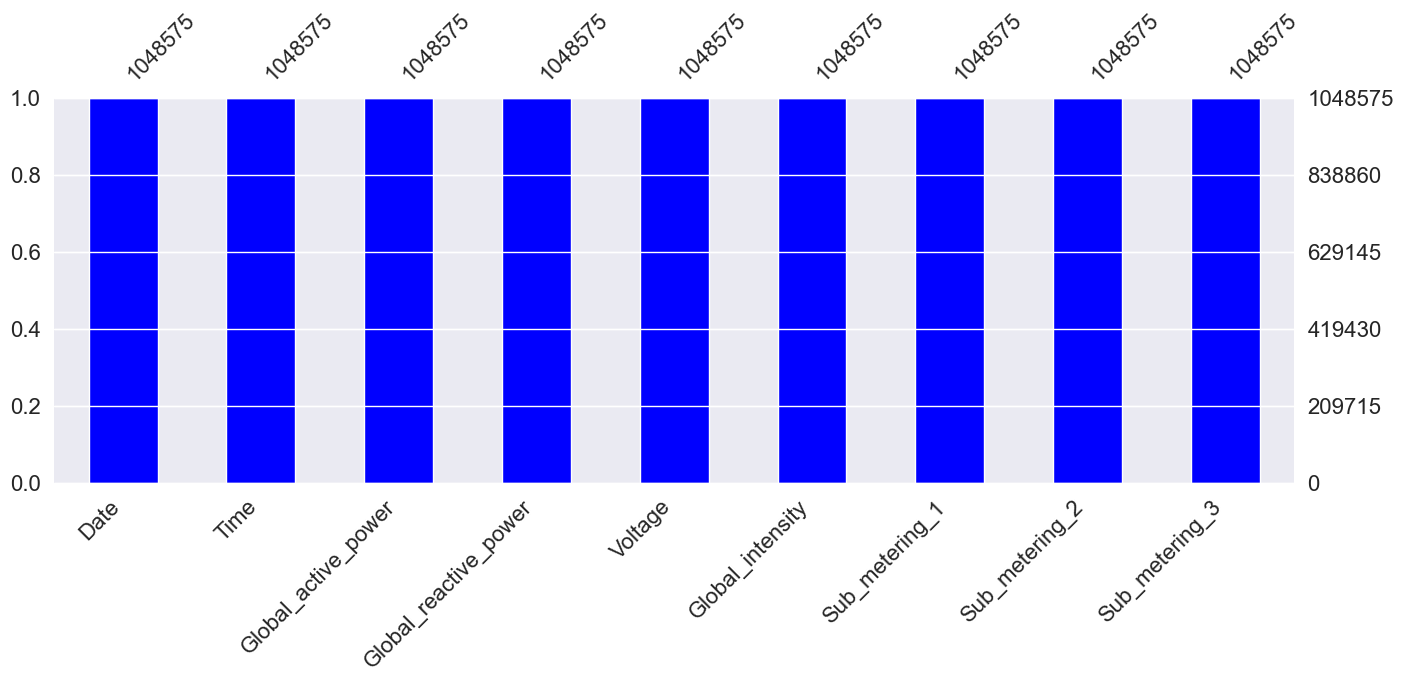

In [137]:
msno.bar(householdPowerConsumption_analysis, figsize = (16,5),color = 'blue')
plt.show()

The graph shows there is no missing values in the various data variables. All missing values or nan are replaced with 0's

Statistical Analysis


In [138]:
householdPowerConsumption_analysis['Month'] = householdPowerConsumption_analysis['Date'].dt.month
householdPowerConsumption_analysis['Year'] = householdPowerConsumption_analysis['Date'].dt.year
householdPowerConsumption_analysis['Day'] = householdPowerConsumption_analysis['Date'].dt.weekday
#householdPowerConsumption_analysis['Hour'] = householdPowerConsumption_analysis['Time'].dt.hour



In [139]:
householdPowerConsumption_analysis

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17,12,2006,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16,12,2006,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0,2,17,12,2006,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0,1,17,12,2006,5
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0,1,17,12,2006,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2008-12-13,21:34:00,0.426,0.076,242.27,1.8,0,0,0,12,2008,5
1048571,2008-12-13,21:35:00,0.424,0.076,242.10,1.8,0,0,0,12,2008,5
1048572,2008-12-13,21:36:00,0.422,0.076,241.73,1.8,0,0,0,12,2008,5
1048573,2008-12-13,21:37:00,0.422,0.078,242.56,1.8,0,0,0,12,2008,5


Mean (Average)

In [140]:
print('Mean of Global Active Power :' , householdPowerConsumption_analysis.Global_active_power.mean())
print('Mean of Global Reactive Power :' , householdPowerConsumption_analysis.Global_reactive_power.mean())
print('Mean of Voltage :' , householdPowerConsumption_analysis.Voltage.mean())
print('Mean of Global Intensity :' , householdPowerConsumption_analysis.Global_intensity.mean())

Mean of Global Active Power : 1.1039017848031853
Mean of Global Reactive Power : 0.1178142221586439
Mean of Voltage : 239.0286379133586
Mean of Global Intensity : 4.699814128698471


Median (Center of a set of values)

In [141]:
print('Median of Global Active Power :' , householdPowerConsumption_analysis.Global_active_power.median())
print('Median of Global Reactive Power :' , householdPowerConsumption_analysis.Global_reactive_power.median())
print('Median of Voltage :' , householdPowerConsumption_analysis.Voltage.median())
print('Median of Global Intensity :' , householdPowerConsumption_analysis.Global_intensity.median())

Median of Global Active Power : 0.542
Median of Global Reactive Power : 0.098
Median of Voltage : 240.2
Median of Global Intensity : 2.4


Mode (The value that appears most often in the set of data values)

In [142]:
print('Mode of Global Active Power :' , householdPowerConsumption_analysis.Global_active_power.mode())
print('Mode of Global Reactive Power :' , householdPowerConsumption_analysis.Global_reactive_power.mode())
print('Mode of Voltage :' , householdPowerConsumption_analysis.Voltage.mode())
print('Mode of Global Intensity :' , householdPowerConsumption_analysis.Global_intensity.mode())

Mode of Global Active Power : 0    0.218
Name: Global_active_power, dtype: float64
Mode of Global Reactive Power : 0    0.0
Name: Global_reactive_power, dtype: float64
Mode of Voltage : 0    0.0
Name: Voltage, dtype: float64
Mode of Global Intensity : 0    1.0
Name: Global_intensity, dtype: float64


Correlation

In [143]:
correlation_variables = householdPowerConsumption_analysis[['Global_active_power','Global_reactive_power','Voltage' ,'Global_intensity']]
correlation_variables.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,0.498,233.29,23.0
3,5.388,0.502,233.74,23.0
4,3.666,0.528,235.68,15.8


In [144]:
correlation_variables.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.257888,-0.026314,0.999023
Global_reactive_power,0.257888,1.000000,0.039738,0.274849
Voltage,-0.026314,0.039738,1.000000,-0.027953
Global_intensity,0.999023,0.274849,-0.027953,1.000000


There's a positive relationship between Global active power and Global reactive power , and a negative relationship between Voltage and Global_intensity

<Axes: >

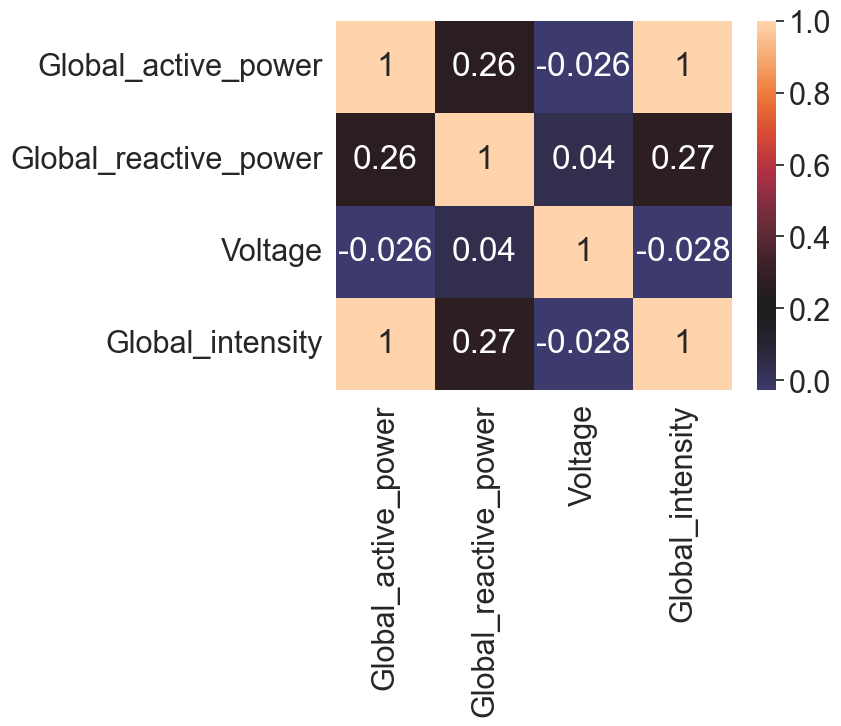

In [145]:
sns.heatmap(data=correlation_variables.corr(),
            annot = True,
            fmt = '.2g',
            center= 0.2)

Most of the dataset variables are positively correlated to each other compared to the negatively related ones . This assumes the dataset can be good for statistical analysis and prediction

Standard Deviation

(Degree to which individuals in the sample differ from the sample mean)

Measures how much the observation differ from the mean (average) . How dispersed is the data ?

In [146]:
print('Standard Deviation of Global Active Power :' , householdPowerConsumption_analysis.Global_active_power.std())
print('Standard Deviation of Global Reactive Power :' , householdPowerConsumption_analysis.Global_reactive_power.std())
print('Standard Deviation of Voltage :' , householdPowerConsumption_analysis.Voltage.std())
print('Standard Deviation of Global Intensity :' , householdPowerConsumption_analysis.Global_intensity.std())

Standard Deviation of Global Active Power : 1.12945555536475
Standard Deviation of Global Reactive Power : 0.10954061803614036
Standard Deviation of Voltage : 15.274863081778378
Standard Deviation of Global Intensity : 4.763377421024939


Normal Distribution (The 68 - 95 - 99  rule)

In [147]:
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [148]:
householdPowerConsumption_analysis.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17,12,2006,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16,12,2006,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0,2,17,12,2006,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0,1,17,12,2006,5
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0,1,17,12,2006,5


Shapiro-Wilk Test

Global_active_power

<Axes: ylabel='Density'>

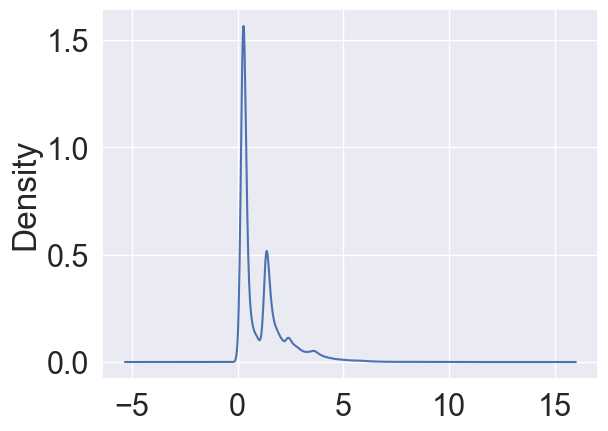

In [149]:
householdPowerConsumption_analysis.Global_active_power.plot.density()

In [150]:
householdPowerConsumption_analysis.loc[(householdPowerConsumption_analysis.Global_active_power <= householdPowerConsumption_analysis.Global_active_power.mean() + 1 * householdPowerConsumption_analysis.Global_active_power.std()) &
         (householdPowerConsumption_analysis.Global_active_power >= householdPowerConsumption_analysis.Global_active_power.mean() - 1 * householdPowerConsumption_analysis.Global_active_power.std())].Global_active_power.count()/householdPowerConsumption_analysis.Global_active_power.count()

0.8590372648594521

In [151]:
st.shapiro(householdPowerConsumption_analysis.Global_active_power)

ShapiroResult(statistic=0.7956840854332816, pvalue=4.9215831188922646e-179)

In [152]:
stat, p  = st.shapiro(householdPowerConsumption_analysis.Global_active_power)
print(p)

if p > 0.05 :
    print('Sample looks Gaussian/Data is likely normally distributed(We fail to reject H0)')
else:
    print('Samples does not look Gaussian/Data is not normally distributed(reject H0)')    

4.9215831188922646e-179
Samples does not look Gaussian/Data is not normally distributed(reject H0)


Global_reactive_power

<Axes: ylabel='Density'>

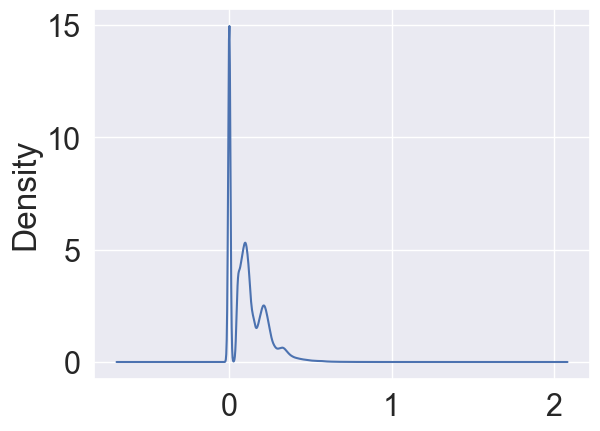

In [153]:
householdPowerConsumption_analysis.Global_reactive_power.plot.density()

In [154]:
stat, p  = st.shapiro(householdPowerConsumption_analysis.Global_reactive_power)
print(p)

if p > 0.05 :
    print('Sample looks Gaussian/Data is likely normally distributed(We fail to reject H0)')
else:
    print('Samples does not look Gaussian/Data is not normally distributed(reject H0)')  

2.193884969367396e-158
Samples does not look Gaussian/Data is not normally distributed(reject H0)


Voltage

<Axes: ylabel='Density'>

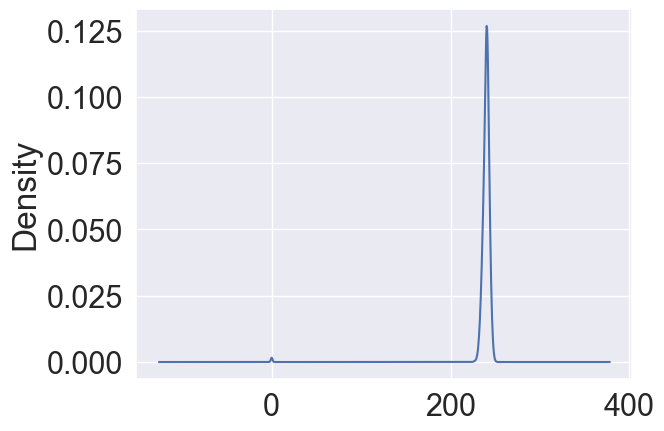

In [155]:
householdPowerConsumption_analysis.Voltage.plot.density()

In [156]:
stat, p  = st.shapiro(householdPowerConsumption_analysis.Voltage)
print(p)

if p > 0.05 :
    print('Sample looks Gaussian/Data is likely normally distributed(We fail to reject H0)')
else:
    print('Samples does not look Gaussian/Data is not normally distributed(reject H0)') 

1.156739179609408e-232
Samples does not look Gaussian/Data is not normally distributed(reject H0)


Global_intensity

<Axes: ylabel='Density'>

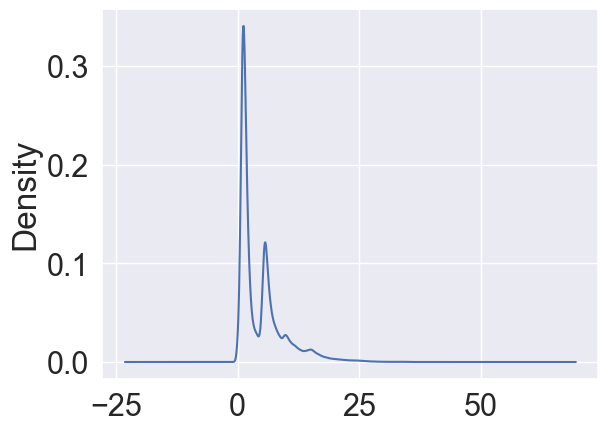

In [157]:
householdPowerConsumption_analysis.Global_intensity.plot.density()

In [158]:
stat, p  = st.shapiro(householdPowerConsumption_analysis.Global_intensity)
print(p)

if p > 0.05 :
    print('Sample looks Gaussian/Data is likely normally distributed(We fail to reject H0)')
else:
    print('Samples does not look Gaussian/Data is not normally distributed(reject H0)')  

5.0816377325675854e-179
Samples does not look Gaussian/Data is not normally distributed(reject H0)


Standard Error of the Mean

(estimates how far the sample mean can be far from the population mean)
Compares the sample mean vrs the population mean


In [159]:
print('Standard Error (Global_active_power) :' ,st.sem(householdPowerConsumption_analysis.Global_active_power))
print('Standard Error (Global_reactive_power) :' ,st.sem(householdPowerConsumption_analysis.Global_reactive_power))
print('Standard Error (Voltage) :' ,st.sem(householdPowerConsumption_analysis.Voltage))
print('Standard Error (Global_intensity) :' ,st.sem(householdPowerConsumption_analysis.Global_intensity))



Standard Error (Global_active_power) : 0.0011029844667299928
Standard Error (Global_reactive_power) : 0.00010697331080978
Standard Error (Voltage) : 0.01491686559121669
Standard Error (Global_intensity) : 0.004651737980841715


Confidential Interval

Meansures the mean (average) of something (a variable) in a dataset.
The confidence level gives the probability with which an estimates interval will contain the true value of the parameter

Global_active_power

In [160]:
print('Mean : ' ,householdPowerConsumption_analysis.Global_active_power.mean())
st.norm.interval(confidence = 0.95,
                 loc = householdPowerConsumption_analysis.Global_active_power.mean(),
                 scale = st.sem(householdPowerConsumption_analysis.Global_active_power))

Mean :  1.1039017848031853


(1.1017399749728873, 1.1060635946334834)

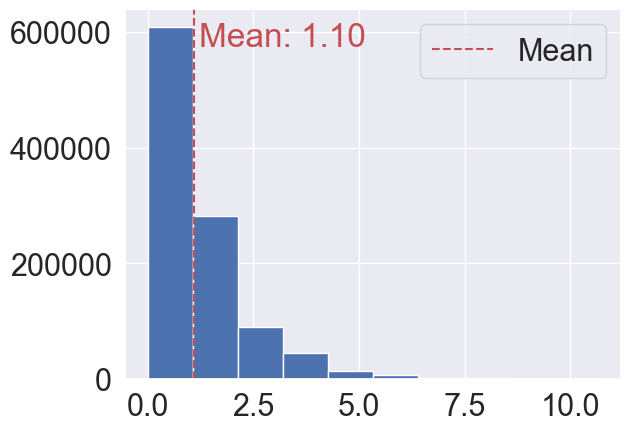

In [161]:
householdPowerConsumption_analysis.Global_active_power.hist()
mean_intensity = householdPowerConsumption_analysis.Global_active_power.mean()
plt.axvline(x=mean_intensity, color='r', linestyle='--', label='Mean')
plt.text(mean_intensity + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_intensity:.2f}', color='r')
plt.legend()
plt.show()

Global_reactive_power

In [162]:
print('Mean : ' ,householdPowerConsumption_analysis.Global_reactive_power.mean())
st.norm.interval(confidence = 0.95,
                 loc = householdPowerConsumption_analysis.Global_reactive_power.mean(),
                 scale = st.sem(householdPowerConsumption_analysis.Global_reactive_power))

Mean :  0.1178142221586439


(0.11760455832214972, 0.11802388599513808)

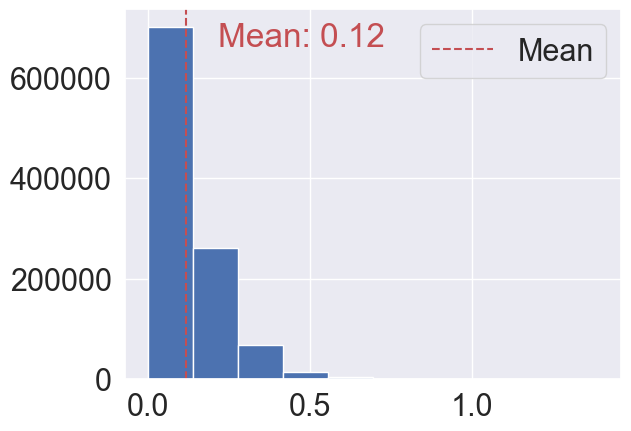

In [163]:
householdPowerConsumption_analysis.Global_reactive_power.hist()
mean_intensity = householdPowerConsumption_analysis.Global_reactive_power.mean()
plt.axvline(x=mean_intensity, color='r', linestyle='--', label='Mean')
plt.text(mean_intensity + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_intensity:.2f}', color='r')
plt.legend()
plt.show()

Voltage

In [164]:
print('Mean : ' ,householdPowerConsumption_analysis.Voltage.mean())
st.norm.interval(confidence = 0.95,
                 loc = householdPowerConsumption_analysis.Voltage.mean(),
                 scale = st.sem(householdPowerConsumption_analysis.Voltage))

Mean :  239.0286379133586


(238.9994013940376, 239.05787443267963)

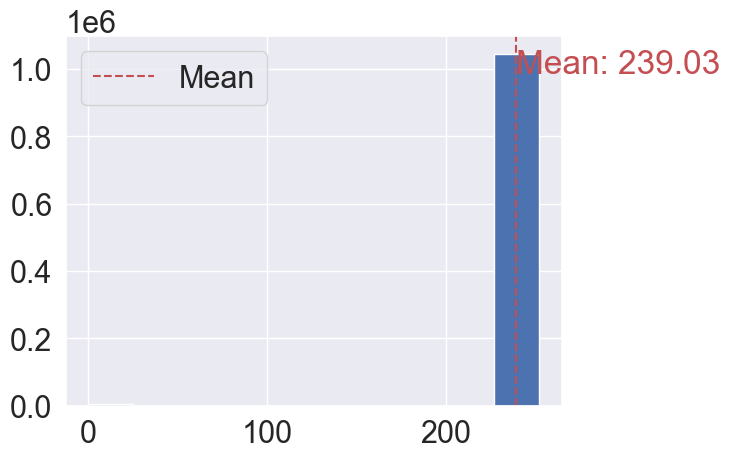

In [165]:
# Plot histogram
householdPowerConsumption_analysis.Voltage.hist()

# Calculate mean
mean_intensity = householdPowerConsumption_analysis.Voltage.mean()

# Add mean as a vertical line on the plot
plt.axvline(x=mean_intensity, color='r', linestyle='--', label='Mean')

# Labeling the mean line
plt.text(mean_intensity + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_intensity:.2f}', color='r')
# Show plot
plt.legend()
plt.show()

Global_intensity

In [166]:
print('Mean : ' ,householdPowerConsumption_analysis.Global_intensity.mean())
st.norm.interval(confidence = 0.95,
                 loc = householdPowerConsumption_analysis.Global_intensity.mean(),
                 scale = st.sem(householdPowerConsumption_analysis.Global_intensity))

Mean :  4.699814128698471


(4.690696889790504, 4.708931367606438)

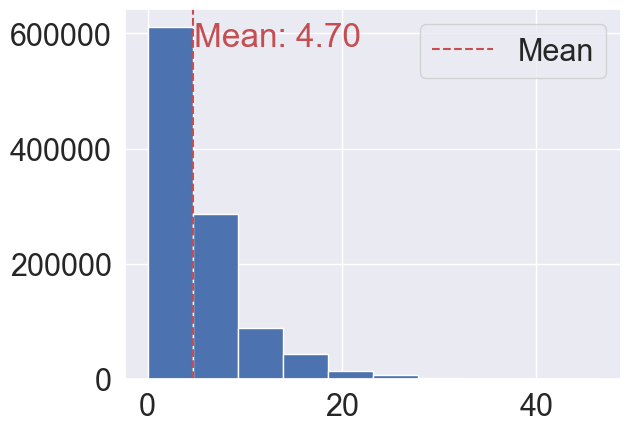

In [167]:
# Plot histogram
householdPowerConsumption_analysis.Global_intensity.hist()

# Calculate mean
mean_intensity = householdPowerConsumption_analysis.Global_intensity.mean()

# Add mean as a vertical line on the plot
plt.axvline(x=mean_intensity, color='r', linestyle='--', label='Mean')

# Labeling the mean line
plt.text(mean_intensity + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_intensity:.2f}', color='r')
# Show plot
plt.legend()
plt.show()


T test 

T-test are used to measure continous variables to check if there is a different

In [168]:
householdPowerConsumption_analysis.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17,12,2006,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16,12,2006,5


In [169]:
active = householdPowerConsumption_analysis.Global_active_power
reactive = householdPowerConsumption_analysis.Global_reactive_power

In [170]:
stat , p = st.ttest_ind(a =  active , b = reactive)
print(p)

if p > 0.05:
     print('There are similarities between Global_active_power and Global_reactive_power(We fail to reject the null hypothesis (H0) )')
else:
     print(' There is a different between Global_active_power and Global_reactive_power (reject the null hypothesis(H0))')


0.0
 There is a different between Global_active_power and Global_reactive_power (reject the null hypothesis(H0))


<Axes: >

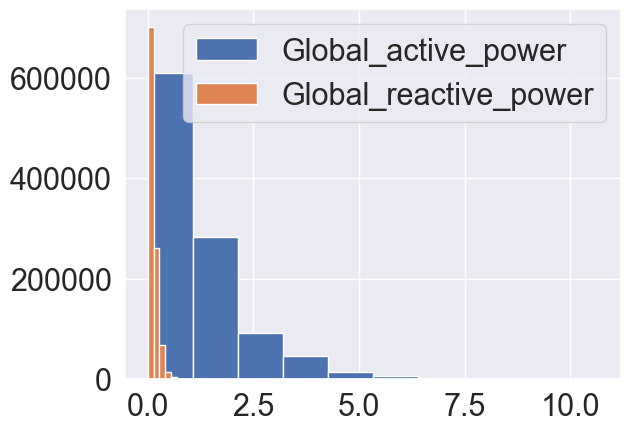

In [171]:
active.hist(legend=True)
reactive.hist(legend=True)

Chi-square Test

Chi-square test are used to compare non-continous variables whether there is a relationship between variables

In [172]:
householdPowerConsumption_analysis.head(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17,12,2006,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16,12,2006,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0,2,17,12,2006,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0,1,17,12,2006,5


In [173]:
tab = pd.crosstab(index = householdPowerConsumption_analysis.Year,
                  columns = householdPowerConsumption_analysis.Sub_metering_3)
tab

Sub_metering_3,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Year,,,,,,,,,,,,,,,,,,,,,
2006,12654,3,5,8,9,8,10,3,8,8,...,0,0,0,0,0,0,0,0,0,0
2007,350461,145,135,137,159,143,153,155,137,164,...,0,0,0,0,0,0,0,0,0,0
2008,201266,134774,524,499,512,500,532,526,507,503,...,149,159,156,164,163,273,1100,1701,510,23


In [174]:
chi2 , p, dof, exp = st.chi2_contingency(tab)
print(p)

if p > 0.05:
    print('There is no relationship (fail to reject the null hypothesis(H0)) ')
else:
    print('There is strong relationship (reject the null hypothesis(H0))')  

0.0
There is strong relationship (reject the null hypothesis(H0))


Linear Regression

The study of dependent variable and at least one independent variable.

Method : What is the impact of X on Y ?

Data preparation

In [175]:
#isolate x and y
x = householdPowerConsumption_analysis.Global_active_power
y = householdPowerConsumption_analysis.Global_reactive_power

In [176]:
#adding constant
import statsmodels.api as sm
x = sm.add_constant(x)
x


,const,Global_active_power
0,1.0,4.216
1,1.0,5.360
2,1.0,5.374
3,1.0,5.388
4,1.0,3.666
...,...,...
1048570,1.0,0.426
1048571,1.0,0.424
1048572,1.0,0.422
1048573,1.0,0.422


In [177]:
model = sm.OLS(endog=y , exog=x).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Global_reactive_power   R-squared:                       0.067
Model:                               OLS   Adj. R-squared:                  0.067
Method:                    Least Squares   F-statistic:                 7.470e+04
Date:                   Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                           17:24:01   Log-Likelihood:             8.6710e+05
No. Observations:                1048575   AIC:                        -1.734e+06
Df Residuals:                    1048573   BIC:                        -1.734e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

The summary of the linear regression indicates the result which can be explain as follows

The intercept(const)

In the coef column ,  the intercept (const) is the value of the dependent variable when all independent variables are zero. In this case, it's the value of Global_reactive_power when Global_active_power is zero.

The coefficient

The coefficient of Global_active_power is 0.0250 .This means that for every one-unit increase in Global_active_power, the Global_reactive_power is expected to increase by 0.0250 units, all else being equal.

Conversely, for every one-unit decrease in Global_active_power, the Global_reactive_power is expected to decrease by 0.0250 units, again assuming all other factors remain constant

The coefficient of Global_active_power represents the change in the dependent variable (Global_reactive_power) for a one-unit change in the independent variable (Global_active_power), holding all other variables constant.

R-squared

R-squared is 0.067, indicating that approximately 6.7% of the variability in Global_reactive_power can be explained by Global_active_power. 
It signifies how much of the variability we can explain with our model


The confidence interval (95%)

The confidence interval provides a range within which we can be reasonably confident that the true population parameter lies. In the context of regression analysis, it refers to the range of values within which we expect the true coefficient of an independent variable to fall with a certain level of confidence (typically 95%).

Lower Bound: This is the lower limit of the range. It represents the lowest plausible value for the coefficient of the independent variable.

Upper Bound: This is the upper limit of the range. It represents the highest plausible value for the coefficient of the independent variable.

Range: The range between the lower and upper bounds represents the uncertainty associated with estimating the coefficient.

The confidence interval for the Global_active_power  is between the range [0.0245 - 0.0255]


The statistical significance

The p value is represented in the summary as P > t (absolute t) , 
if it is less than the significance level (0.05), then the coefficient is statistically significant otherwise it is statistically insignificant.

The P value is 0.000 which means it is statistically significant because 0.000 is less than 0.05.


Text(0, 0.5, 'Global Reactive Power')

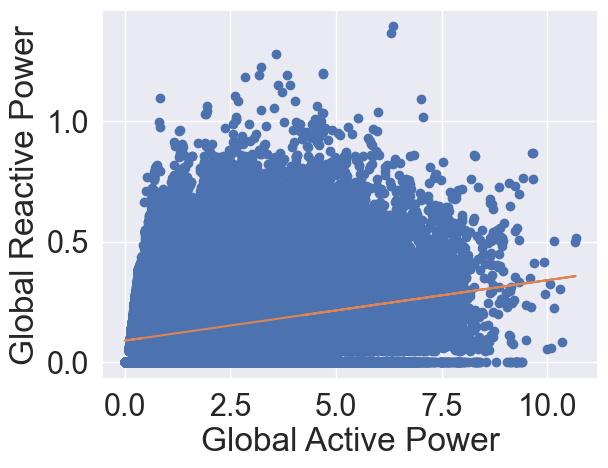

In [178]:
#plottting the linear regression
#the b is the slope of the line 
x = householdPowerConsumption_analysis.Global_active_power
plt.plot(x,y ,'o')
b, a = np.polyfit(x, y , 1)
plt.plot(x, b * x + a )
plt.xlabel('Global Active Power')
plt.ylabel('Global Reactive Power')

Multilinear Regression

In [179]:
householdPowerConsumption_analysis.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17,12,2006,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16,12,2006,5


In [180]:
householdPowerConsumption_analysis.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2007-12-15 07:31:23.412059392,1.103902e+00,1.178142e-01,2.390286e+02,4.699814e+00,1.172882e+00,1.469452e+00,5.910810e+00,6.498591e+00,2.007457e+03,3.000486e+00
min,2006-12-16 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03,0.000000e+00
25%,2007-06-16 00:00:00,2.860000e-01,0.000000e+00,2.379300e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.007000e+03,1.000000e+00
50%,2007-12-15 00:00:00,5.420000e-01,9.800000e-02,2.402000e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,2.007000e+03,3.000000e+00
75%,2008-06-14 00:00:00,1.542000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,9.000000e+00,2.008000e+03,5.000000e+00
max,2008-12-13 00:00:00,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,1.200000e+01,2.008000e+03,6.000000e+00
std,NaN,1.129456e+00,1.095406e-01,1.527486e+01,4.763377e+00,6.309331e+00,6.341029e+00,8.202752e+00,3.439283e+00,5.385978e-01,2.000001e+00


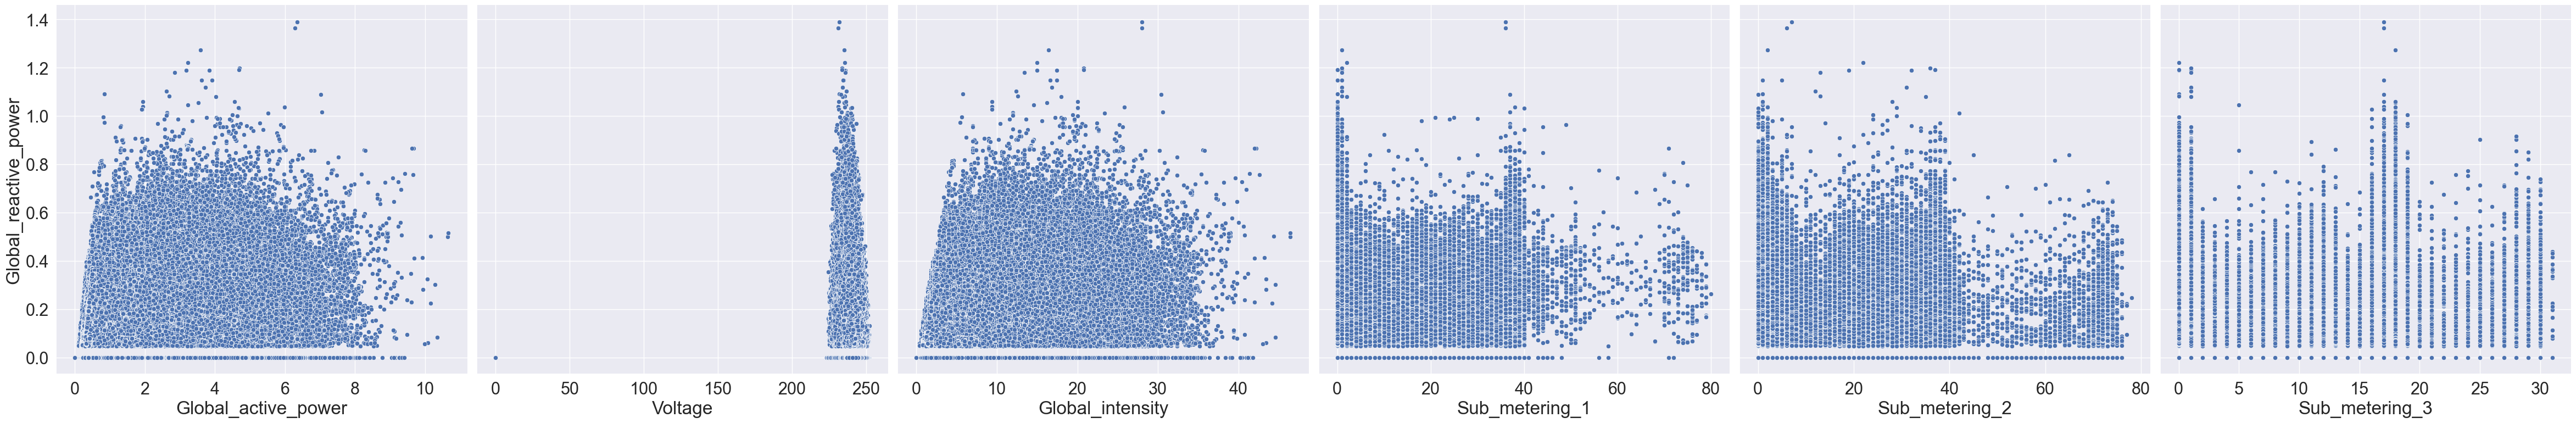

In [181]:
#plotting continuos (IV) independent variable against dependent variable
sns.set(font_scale=2)
sns.pairplot( data = householdPowerConsumption_analysis,
             y_vars = ['Global_reactive_power'],
             x_vars = ['Global_active_power' ,'Voltage' , 'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'],
             height = 8)

In [182]:
householdPowerConsumption_analysis_correlation = householdPowerConsumption_analysis[['Global_active_power', 'Global_intensity','Sub_metering_1','Sub_metering_2']]

<Axes: >

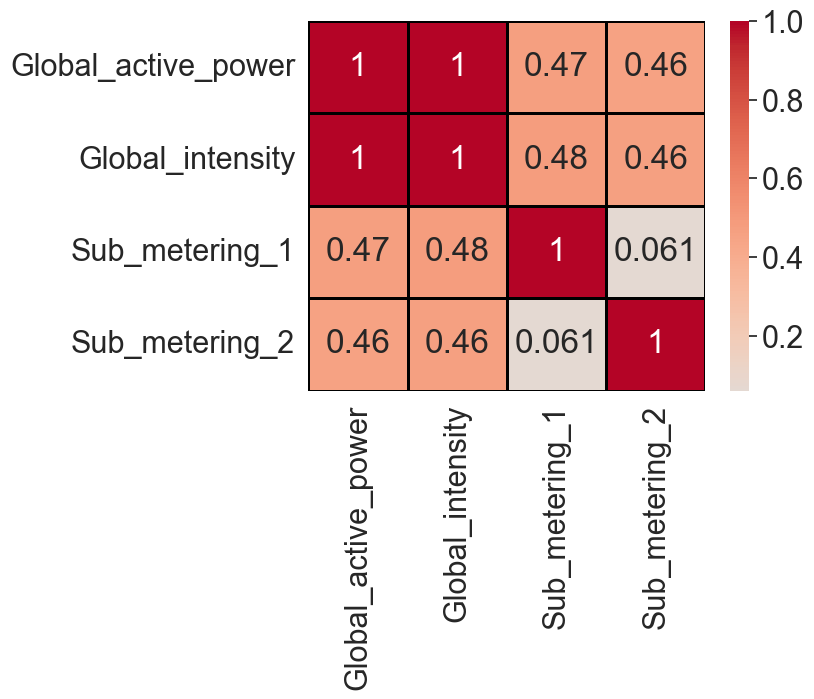

In [183]:
#correlation matrix
sns.heatmap(householdPowerConsumption_analysis_correlation.corr(),
            annot = True ,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black')

In [184]:
#isolate X and Y
y = householdPowerConsumption_analysis['Global_reactive_power']
x = householdPowerConsumption_analysis[['Global_active_power', 'Global_intensity','Sub_metering_1','Sub_metering_2']]

In [185]:
#adding constant
x = sm.add_constant(x)
x.head()

,const,Global_active_power,Global_intensity,Sub_metering_1,Sub_metering_2
0,1.0,4.216,18.4,0,1
1,1.0,5.360,23.0,0,1
2,1.0,5.374,23.0,0,2
3,1.0,5.388,23.0,0,1
4,1.0,3.666,15.8,0,1


In [186]:
#Training and Testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y ,
                                                    test_size = 0.2,
                                                    random_state = 1502)
x_train.head(2)

,const,Global_active_power,Global_intensity,Sub_metering_1,Sub_metering_2
844564,1.0,0.162,0.6,0,0
663824,1.0,3.064,13.0,0,28


In [187]:
model = sm.OLS(endog=y , exog=x).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Global_reactive_power   R-squared:                       0.220
Model:                               OLS   Adj. R-squared:                  0.220
Method:                    Least Squares   F-statistic:                 7.384e+04
Date:                   Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                           17:25:58   Log-Likelihood:             9.6113e+05
No. Observations:                1048575   AIC:                        -1.922e+06
Df Residuals:                    1048570   BIC:                        -1.922e+06
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

Explaination of the Result 

The coefficient 
The intercept (const) is 0.0782 which indicate that the const will be 0.0781 when all the independent variables is 0.

The Global_active_power is -0.8442 which means when Global_active_power decrease by 1 unit ,the Global_reactive_power is expected to decrease by -0.8457

The Global intensity is 0.2071 which means that when Global_intensity increase by 1 unit ,the Global_reactive_power is expected to increase by 0.2074

The Sub_metering_1 is -0.0007 which means when Sub_metering_1 decreasse by 1 unit, the Global_reactive_power is expected to decrease by -0.0006

The Sub_metering_2 is -0.0006 which means when Sub_metering_1 decreasse by 1 unit, the Global_reactive_power is expected to decrease by -0.0006


The R-Squared 

The Adjusted R-Squared is 22.1 which means 22.1 of the variability of Global_reactive_power can be explained by the independent variables. A higher R-squared value indicates a better fit of the model to the data.

 
The Confidence Interval

The confidence interval for Global_active_power is between the range (-0.848 - -0.840)
The confidence interval for Global_intensity is between the range (0.206 - 0.208)
The confidence interval for Sub_metering_1 is between the range (-0.001 - -0.001)
The confidence interval for Sub_metering_2 is between the range (-0.001 - -0.001)
These intervals provide a range of values within which we are reasonably confident the true population parameter lies


Statistical Significance

The independence variables are statistically significant because there are less than the significant level that is 0.005.
Statistical significance indicates whether the independent variable has a significant effect on the dependent variable, holding other variables constant



In [188]:
#predict
predictions = model.predict(x_test)
predictions[:4]

887812    0.108746
27788     0.078591
72897     0.169445
371800    0.196042
dtype: float64

In [189]:
#accuracy assessment
from sklearn.metrics import mean_absolute_error ,mean_squared_error

print('MAE (Mean Absolute Error) :' , round(mean_absolute_error(y_test,predictions),1))
print('RSME (Root Squared Mean Error) :' , round(np.sqrt(mean_squared_error(y_test,predictions)),1))

MAE (Mean Absolute Error) : 0.1
RSME (Root Squared Mean Error) : 0.1


Both MAE and RMSE equal to 0.1 indicates that the model's predictions are, on average, quite close to the actual values of Global_reactive_power. This suggests that the model is performing well in terms of accuracy, with errors that are relatively small.

Machine Learning (scikit-learn)

Random Forest Regressor

In [190]:
householdPowerConsumption_analysis.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17,12,2006,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0,1,16,12,2006,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0,2,17,12,2006,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0,1,17,12,2006,5
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0,1,17,12,2006,5


In [191]:
from sklearn.ensemble import RandomForestRegressor


#create the data
x = householdPowerConsumption_analysis[['Global_active_power','Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = householdPowerConsumption_analysis.Voltage

#training and testing the data
x_train , x_test , y_train ,y_test = train_test_split( x, y ,
                                                      test_size=0.2)

#Instantiate the model
model =  RandomForestRegressor()

#fit the model to the data
model.fit(x_train,y_train)




RandomForestRegressor()

In [192]:
#Evaluate the Random Forest Classifier (use the patterns the model has learn)
model.score(x_test,y_test)

0.9797877865846236

In [193]:
#Use a trained model to make predictions
y_preds = model.predict(x_test)
y_preds

array([242.46139476, 238.79954504, 242.07705262, ..., 239.10027   ,
       231.88043521, 240.41872179])

In [194]:
np.array([y_test])

array([[241.49, 235.15, 244.09, ..., 239.69, 230.03, 239.89]])

In [195]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

1.5780837625270379

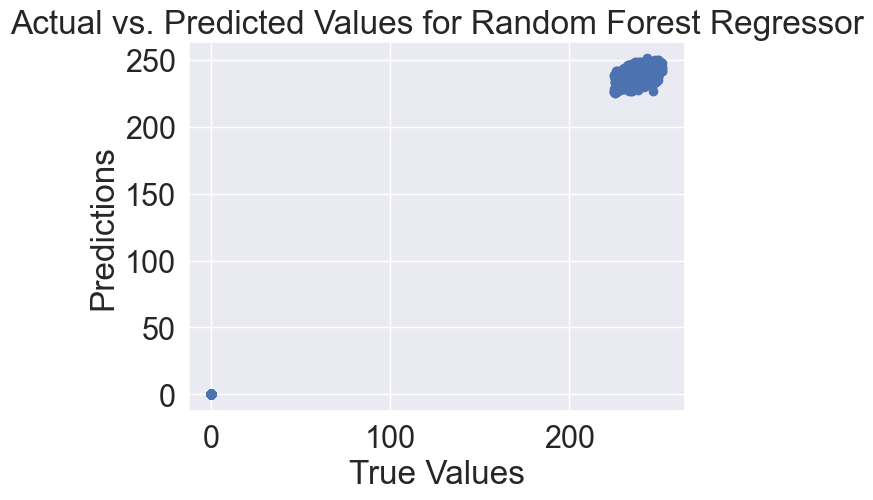

In [196]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs. Predicted Values for Random Forest Regressor")
plt.show()

<Figure size 1000x600 with 0 Axes>

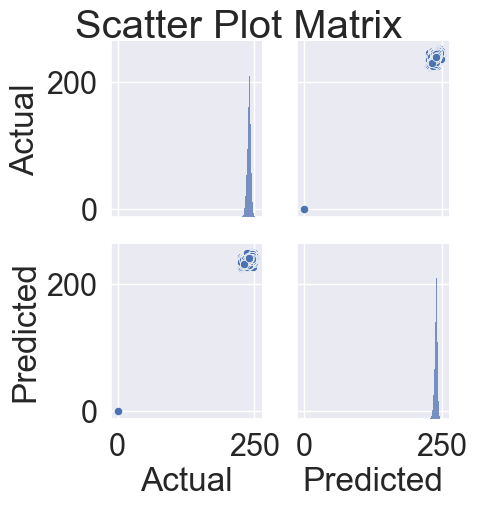

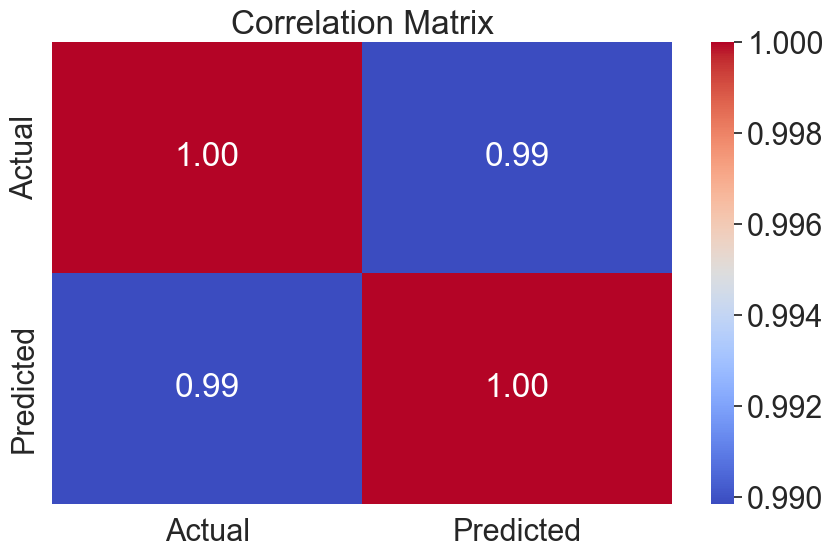

In [197]:
# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot scatter plot matrix
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier

#create the data
x = householdPowerConsumption_analysis[['Global_active_power','Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = householdPowerConsumption_analysis.Year

#training and testing the data
x_train , x_test , y_train ,y_test = train_test_split( x, y ,
                                                      test_size=0.2)

#Instantiate the model
model =  RandomForestClassifier()

#fit the model to the data
model.fit(x_train,y_train)

RandomForestClassifier()

In [199]:
model.score(x_test,y_test)

0.747080561714708

In [200]:
y_preds = model.predict(x_test)
y_preds

array([2007, 2007, 2008, ..., 2008, 2008, 2008])

In [201]:
np.array([y_test])

array([[2007, 2007, 2008, ..., 2008, 2008, 2008]])

In [202]:
#accuracy assessing
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.2597334477743604

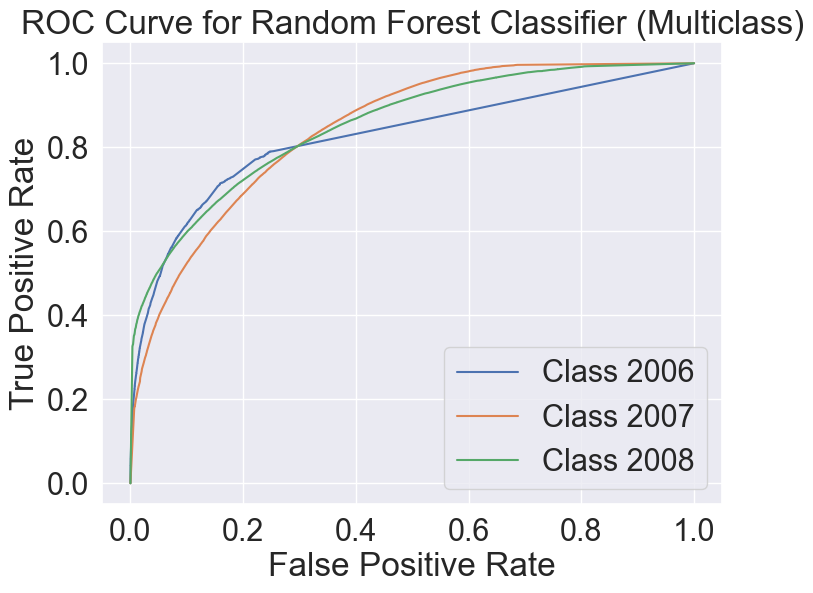

In [203]:
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.preprocessing import label_binarize



# Convert y_test to binary format using one-vs-all strategy
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Get the probability estimates for each class
y_scores = model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (Multiclass)')
plt.legend()
plt.show()

ROC is  the plot between TPR (True Postive Rate) and FPR (False Positive Rate) across

To explain the graph , the curve starts from 0.0 where all predictions are negative and moves towards the point 1 where all predictions are positive . This indicate that from class 2006 to class 2008 had a strong prediction rate as AUC (Area Under Curve) curves  are close to the top-left corner, which indicates model’s performance is best.

CONSCLUSION

To conclude , the above analysis draws insight on the relation between Global_active_power and Global_reactive_power using the linear regression .

With the Multilinear regression , the relationship between the dependent variable (Global_reactive_power) and the independent variables (Global_active_power ,Global_intensity,Sub_metering_1 ,Sub_metering_2 ) were analysed as this increases or decreases , the other increases or decreases

The machine learning model brought insight predictions about the dataset and finally representing it with graph